In [21]:
import numpy as np
import pandas as pd
import data_helper
import matplotlib.pyplot as plt
from sklearn import linear_model

## Cargando los Datos

### Descripcion de los Datos

**Area_Lote**: Area del lote en metros cuadrados

**Precio**: Precio total de la propiedad en Quetzales

In [22]:
data = pd.read_csv('data.csv')

In [23]:
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Modelos de Regresion Lineal

### Modelo 1  
$y = 2.41262565 x + 107748.55024667$

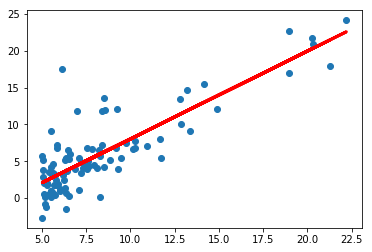

In [24]:
reg = linear_model.LinearRegression()

x = data['x'].values.reshape(-1, 1)
y = data['y'].values

reg.fit(x,y)

y_hat = reg.predict(x)

plt.scatter(x, y)
plt.plot( x, y_hat, color='red', linewidth=3)
plt.show()

In [25]:
m = reg.coef_[0]
b = reg.intercept_
print(' y = {0} * x  {1}'.format(m, b))

 y = 1.193033644189594 * x  -3.8957808783118537


# Batch Gradient Descent


In [26]:
x_df = pd.DataFrame(data.x)
y_df = pd.DataFrame(data.y)

### Costo
$\operatorname {Costo} ={\frac {1}{2m}}\sum _{i=1}^{m}(h_{\theta}(x)-Y_{i})^{2}$

In [27]:
def cost_function(x, y, theta_1, theta_0):

    m = len(y)

    '''
    ### Implementa tu codigo aqui### 
    Obten los valores de la hipotesis, y calcula el costo utilizando la 
    formula que esta en la celda anterior.
    Esta funcion sera utilizada despues paracalcular el costo en cada iteracion 
    del gradient descent.
    '''
    hipotesis = theta_1*x + theta_0
    costo = np.sum((hipotesis-y)**2/(2*m))

    return costo

#### Probando la funcion de costo
En esta celda vamos a probar la funcion de costo, para los valores de 

$\theta_{0} =  -3.8957808783118537$

$\theta_{1} = 1.193033644189594$

Debemos obtener el valor de 4.476971375975179

In [28]:
theta_0 = -3.8957808783118537
theta_1 = 1.193033644189594

x = np.array(x_df).flatten()
y = np.array(y_df).flatten()

cost_function(x, y, theta_1, theta_0)

4.4769713759751779

### Batch Gradient Descent

Derivada de la funcion de costo:
$\frac{\partial}{\partial \theta} J(\theta) = (h_{\theta}(x)-y) \cdot x_{j} $

En cada repeticion:

$\theta_{0} := \theta_{0} - \alpha {\frac {1}{m}} \sum _{i=1}^{m} (h_{\theta}(x)-y) $

$\theta_{1} := \theta_{1} - \alpha {\frac {1}{m}} \sum _{i=1}^{m} (h_{\theta}(x)-y) \cdot x_{j} $

Iteracion:  0
Costo:  5.90946070281


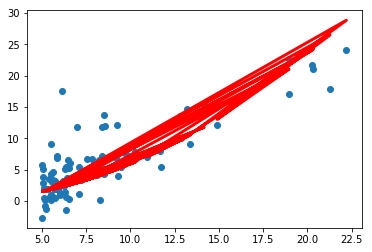

Iteracion:  20
Costo:  7.34799807828


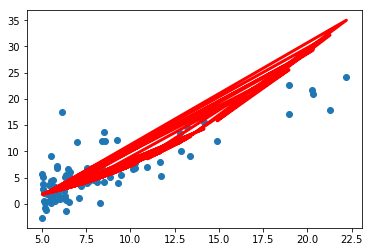

Iteracion:  40
Costo:  7.34799807828


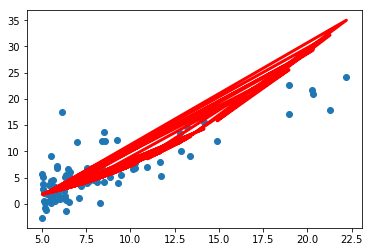

Iteracion:  60
Costo:  7.34799807828


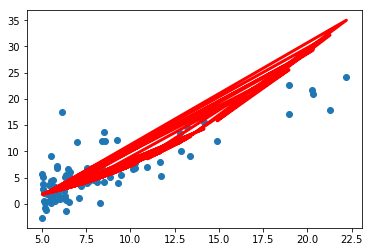

Iteracion:  80
Costo:  7.34799807828


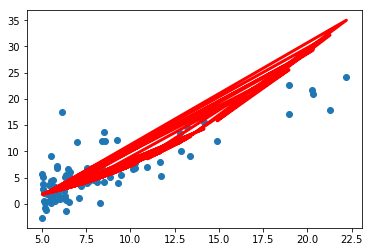

Iteracion:  100
Costo:  7.34799807828


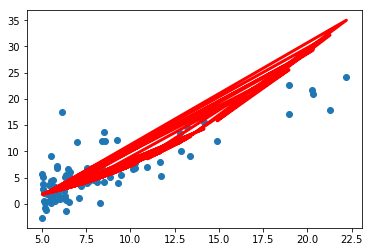

Iteracion:  120
Costo:  7.34799807828


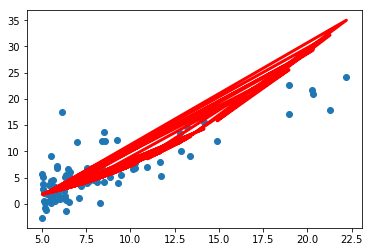

Iteracion:  140
Costo:  7.34799807828


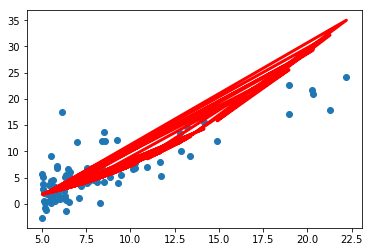

0.0708598988298 [ 0.43296107  0.39169226  0.60362713  0.49624604  0.41522484  0.59401145
  0.52977695  0.6078433   0.45961148  0.35816844  0.40465962  1.00365961
  0.40631066  0.59581837  0.39969943  0.38118374  0.4510516   0.36351837
  0.45560081  0.50103617  0.438559    1.43633015  0.38902793  0.44826681
  0.39432825  1.34244078  0.90899078  0.77641191  0.93365003  1.57330233
  0.37218453  0.46692422  0.65532652  0.41749235  0.58183772  0.56215992
  0.57367465  0.39726185  0.90955766  0.45020128  0.38313239  0.48769325
  0.8296277   0.4091238   0.55445745  0.50261635  0.35927386  0.41108662
  0.82906082  0.39267722  0.53429781  0.37610309  0.5260568   0.5387549
  0.44874157  0.45059101  0.44458918  0.39962857  0.65971983  0.66988114
  0.62536695  0.36700467  1.50782779  1.05637937  1.34343282  0.51148092
  0.58778995  0.72532192  0.38968693  1.4413612   0.71823593  0.51972193
  0.42559872  0.51202654  0.35620563  0.46398353  0.53418443  0.35688588
  0.7280146   0.36193111  0.40597053

In [29]:
x = np.array(x_df).flatten()
y = np.array(y_df).flatten()

theta_0 = 0
theta_1 = 0

### ingresa el numero de iteracions y el valor de alpha ###
iterations = 150
alpha = 0.01


m = len(y) 


for iteration in range(iterations):
    h = theta_1*x  + theta_0
    
    '''
    ## Implementa tu codigo aqui #####
    Calcula los valores de theta0 y theta1
    '''
    theta_0_temp = theta_0-(alpha*(1/m))*np.sum(h-y)
    theta_1_temp = theta_1-(alpha*(1/m))*(np.sum(h-y)*x)
    
    theta_0 = theta_0_temp
    theta_1 = theta_1_temp
    
    '''
    ## Implementa tu codigo aqui ####
    Utiliza la funcion de costo para 
    '''
    cost = cost_function(x,y,theta_1,theta_0)
    
    ## No modifiques nada desde este punto #####
    if(iteration % 20 == 0):
        print('Iteracion: ', iteration)
        print('Costo: ', cost)
        h = theta_1*x  + theta_0
        plt.scatter(x, y)
        plt.plot( x, h, color='red', linewidth=3)
        plt.show()
        
        
print(theta_0, theta_1) 
print(cost)

# Gradient Descent con Scikit Learn

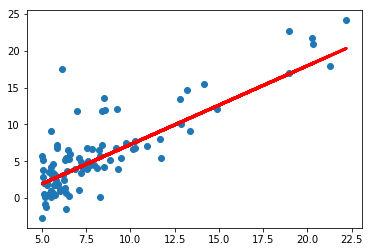

In [30]:
import numpy as np
from sklearn import linear_model


x = data['x'].values.reshape(-1, 1)
y = data['y'].values

clf = linear_model.SGDRegressor(alpha=0.01, loss='squared_loss', max_iter=100)
clf.fit(x, y)

y_hat = clf.predict(x)

plt.scatter(x, y)
plt.plot( x, y_hat, color='red', linewidth=3)
plt.show()